In [36]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import layers

In [37]:
mnist_dataset = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist_dataset.load_data()

In [38]:
print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)
print("y_train Shape", X_train.shape)
print("y_train Shape", X_train.shape)
print("X_train datatype", X_train.dtype)

X_train Shape (60000, 28, 28)
X_test Shape (10000, 28, 28)
y_train Shape (60000, 28, 28)
y_train Shape (60000, 28, 28)
X_train datatype uint8


In [39]:
clothes = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

In [40]:
y_train[1], clothes[y_train[1]]

(0, 'T-shirt/top')

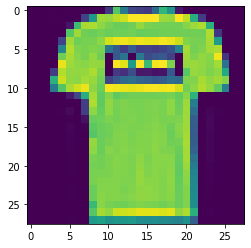

In [41]:
plt.imshow(X_train[1])
plt.show()

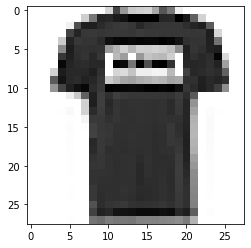

In [42]:
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.show()

In [43]:
model = keras.models.Sequential()

In [44]:
model.add(layers.Flatten(input_shape=[28, 28], name='input'))

In [45]:
model.add(layers.BatchNormalization())
model.add(layers.Dense(300, activation='elu', kernel_initializer="he_normal", name="hidden_one"))
model.add(layers.BatchNormalization())
model.add(layers.Dense(100, activation='elu', kernel_initializer="he_normal", name="hidden_two"))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax', name='output'))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
hidden_one (Dense)           (None, 300)               235500    
_________________________________________________________________
batch_normalization_7 (Batch (None, 300)               1200      
_________________________________________________________________
hidden_two (Dense)           (None, 100)               30100     
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
output (Dense)               (None, 10)               

In [47]:
model.layers

In [49]:
optim = keras.optimizers.SGD(lr= 0.01, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

In [55]:
# Create checkpoint to save model at the end of each epoch
checkpoint_cb = keras.callbacks.ModelCheckpoint("MNIST_DNN_ClassifierModel.h5", save_best_only=True)

# Create early stopping checkpoint
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, validation_split=5/60, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3646 - accuracy: 0.8664 - val_loss: 0.3181 - val_accuracy: 0.8774
Epoch 2/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3325 - accuracy: 0.8772 - val_loss: 0.3254 - val_accuracy: 0.8754
Epoch 3/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3077 - accuracy: 0.8854 - val_loss: 0.3207 - val_accuracy: 0.8752
Epoch 4/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2892 - accuracy: 0.8923 - val_loss: 0.3094 - val_accuracy: 0.8832
Epoch 5/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2735 - accuracy: 0.8993 - val_loss: 0.3048 - val_accuracy: 0.8890
Epoch 6/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2588 - accuracy: 0.9026 - val_loss: 0.3117 - val_accuracy: 0.8876
Epoch 7/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2463 - accuracy: 0.9088 - val_loss: 0.3061 - val_ac

In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8893


[0.34614330530166626, 0.8892999887466431]

In [57]:
X_new = X_test[:5]
y_pred = model.predict(X_new)
y_pred

array([[1.6694289e-09, 1.0780114e-07, 3.8517825e-08, 6.9746108e-08,
        5.9785719e-08, 1.8756379e-03, 1.3204388e-08, 1.4116700e-03,
        4.0790448e-07, 9.9671209e-01],
       [2.1285008e-04, 2.8373782e-11, 9.9876785e-01, 7.8634681e-09,
        8.1759848e-04, 3.3468329e-08, 2.0156681e-04, 2.2547235e-08,
        1.7855137e-10, 1.5691489e-09],
       [1.1303265e-05, 9.9995327e-01, 1.9425459e-06, 1.9830195e-06,
        1.2876047e-06, 2.2674358e-07, 2.8268539e-06, 1.6018815e-08,
        2.7055428e-05, 3.7373784e-09],
       [3.2163240e-07, 9.9997628e-01, 4.9796562e-08, 1.2152358e-05,
        1.6365415e-06, 5.4343632e-06, 3.9655647e-06, 4.6928403e-09,
        4.3649759e-08, 3.2347913e-08],
       [3.8116890e-01, 1.2393413e-07, 9.7817900e-03, 2.7322595e-04,
        1.2134988e-03, 5.5871857e-07, 6.0755950e-01, 7.9274280e-08,
        2.0837774e-06, 1.5982521e-07]], dtype=float32)

In [58]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print('actual values', y_test)
print('predicted values', y_pred)
clothes[y_pred[:]]

actual values [9 2 1 ... 8 1 5]
predicted values [9 2 1 1 6]


array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [66]:
# Saving and restoring the model
model.save('keras_classifier_model.h5')

In [68]:
model = keras.models.load_model('keras_classifier_model.h5')

In [64]:
"""import os
cwd = os.getcwd()
print(cwd)"""

/content
